In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/OR/or_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/by_state/OR/urban/tl_2018_41_tabblock10.shp'
feature = gd.read_file(feature_path).to_crs(grid.crs)
feature = feature.set_index('GEOID10')
feature = gd.clip(feature, grid)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['UR10'] = gd.sjoin(grid, feature, how="left", op="within")['UR10']
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10
id,,,,,,,,,
130.0,-1.370092e+07,5.619686e+06,-1.369992e+07,5.618686e+06,-115.975,0,1,"POLYGON ((-13700919.062 5619685.577, -13699919...",U
131.0,-1.370092e+07,5.618686e+06,-1.369992e+07,5.617686e+06,-106.430,1,1,"POLYGON ((-13700919.062 5618685.577, -13699919...",U
1010.0,-1.369892e+07,5.615686e+06,-1.369792e+07,5.614686e+06,-99.715,1,1,"POLYGON ((-13698919.062 5615685.577, -13697919...",U
1011.0,-1.369892e+07,5.614686e+06,-1.369792e+07,5.613686e+06,-104.800,1,1,"POLYGON ((-13698919.062 5614685.577, -13697919...",U
1012.0,-1.369892e+07,5.613686e+06,-1.369792e+07,5.612686e+06,-96.780,1,1,"POLYGON ((-13698919.062 5613685.577, -13697919...",U
...,...,...,...,...,...,...,...,...,...
298996.0,-1.301892e+07,5.469686e+06,-1.301792e+07,5.468686e+06,-87.690,1,1,"POLYGON ((-13018919.062 5469685.577, -13017919...",U
298997.0,-1.301892e+07,5.468686e+06,-1.301792e+07,5.467686e+06,-96.680,1,1,"POLYGON ((-13018919.062 5468685.577, -13017919...",U
298998.0,-1.301892e+07,5.467686e+06,-1.301792e+07,5.466686e+06,-83.085,1,1,"POLYGON ((-13018919.062 5467685.577, -13017919...",R


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
grid['urban'] = grid['UR10'].map({'U': True, 'R': False})

In [8]:
grid[grid['UR10'] == 'R']

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10,agreement,urban
id,,,,,,,,,,,
4527.0,-1.369092e+07,5.602686e+06,-1.368992e+07,5.601686e+06,-112.010,0,1,"POLYGON ((-13690919.062 5602685.577, -13689919...",R,False,False
6696.0,-1.368592e+07,5.623686e+06,-1.368492e+07,5.622686e+06,-97.785,1,1,"POLYGON ((-13685919.062 5623685.577, -13684919...",R,True,False
7134.0,-1.368492e+07,5.623686e+06,-1.368392e+07,5.622686e+06,-106.850,1,1,"POLYGON ((-13684919.062 5623685.577, -13683919...",R,True,False
7135.0,-1.368492e+07,5.622686e+06,-1.368392e+07,5.621686e+06,-110.645,0,1,"POLYGON ((-13684919.062 5622685.577, -13683919...",R,False,False
7136.0,-1.368492e+07,5.621686e+06,-1.368392e+07,5.620686e+06,-103.325,1,1,"POLYGON ((-13684919.062 5621685.577, -13683919...",R,True,False
...,...,...,...,...,...,...,...,...,...,...,...
297684.0,-1.302192e+07,5.467686e+06,-1.302092e+07,5.466686e+06,-88.180,1,1,"POLYGON ((-13021919.062 5467685.577, -13020919...",R,True,False
297685.0,-1.302192e+07,5.466686e+06,-1.302092e+07,5.465686e+06,-91.475,1,1,"POLYGON ((-13021919.062 5466685.577, -13020919...",R,True,False
298123.0,-1.302092e+07,5.466686e+06,-1.301992e+07,5.465686e+06,-90.635,1,1,"POLYGON ((-13020919.062 5466685.577, -13019919...",R,True,False


In [9]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [20]:
confusion_matrix = pd.crosstab(grid['urban'], grid['agreement'], colnames=['Agreement'], rownames=['Urban'])
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Agreement  False  True  Total
Urban                        
False       1510  1495   3005
True          24    89    113


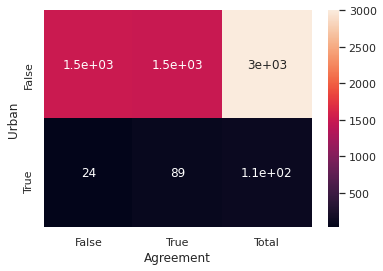

In [21]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [22]:
confusion_matrix = pd.crosstab(grid['urban'], grid['agreement'], colnames=['Agreement'], rownames=['Urban'], normalize='index')
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Agreement     False      True  Total
Urban                               
False      0.502496  0.497504   3005
True       0.212389  0.787611    113


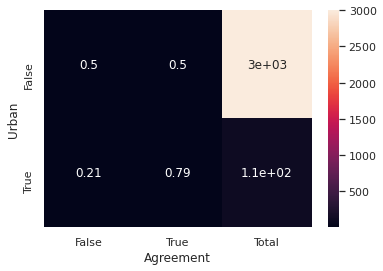

In [23]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()